# LangGraph:Build a custom workflow
## Build a basic chatbot
### 1. Install packages
`pip install -U langgraph langsmith`
### 2. Create a StateGraph
1. 每个节点都可以接收当前状态作为输入，并输出对状态的更新。
2. 由于预构建的 reducer 函数，对消息的更新将被追加到现有列表中，而不是覆盖。

In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
# 我们 State 中的 add_messages 函数将把 LLM 的响应消息附加到状态中已经存在的所有消息上。

class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

### 3. Add a node
接下来，添加一个“ 聊天机器人 “节点。 节点代表工作单元，通常是常规函数。  
`pip install -U "langchain[openai]"`

In [2]:
# # 方法一
# import os
# from langchain.chat_models import init_chat_model

# os.environ["OPENAI_API_KEY"] = "sk-..."

# llm = init_chat_model("openai:gpt-4.1")
# 方法二
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
        # model="Qwen/Qwen2.5-72B-Instruct",
        model="Qwen/Qwen3-8B",
        # 硅基流动
        api_key="sk-jvjyawqpodlkxlywatvemcdykkrbvthhjyjyapyvtnifwlbl",
        base_url="https://api.siliconflow.cn/v1/",
        # # modelscope 
        # base_url="https://api-inference.modelscope.cn/v1/",
        # api_key="ms-e2666046-2f3b-4c76-bcc0-e21f8ebf9ea1",
    )

# 将聊天模型合并到一个简单的节点中：
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
# 注意 chatbot 节点函数如何将当前 State 作为输入，并返回一个字典，其中包含键“messages”下的更新消息列表。

### 4. Add an entry point
添加一个入口点，告诉图每次运行时从哪里开始工作 ：

In [3]:
graph_builder.add_edge(START, "chatbot")

### 5. Add an exit point
添加一个退出点以指示图形应在何处完成执行。  

In [4]:
graph_builder.add_edge("chatbot", END)

### 6. Compile the graph

In [5]:
graph = graph_builder.compile()

### 7. Visualize the graph
draw_ascii  draw_png  draw_mermaid_png

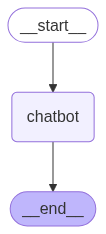

In [6]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

### 8. Run the chatbot

In [7]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: 

中国A股市场是中国资本市场的组成部分，近年来经历了快速的发展和深刻的变革。以下从不同角度分析A股的现状、机遇与挑战：

---

### **1. 现状分析**
#### **1.1 宏观经济与政策环境**
- **经济增长**：中国经济在2023年逐步复苏，但面临结构性调整压力（如房地产、传统制造业转型），增速相对放缓，对市场形成一定支撑。
- **政策支持**：政府持续推动资本市场改革（如注册制改革、退市机制完善），加大对科技、新能源、高端制造等战略产业的支持力度，为相关板块提供政策红利。
- **金融开放**：外资准入进一步放宽（如QFII、RQFII扩容），但市场开放程度仍有限，机构投资者占比（约5%）远低于成熟市场。

#### **1.2 市场特点**
- **波动性较大**：由于投资者情绪驱动明显（散户比例高），A股对消息敏感，易出现剧烈波动，但长期趋势与中国经济基本面关联紧密。
- **估值分化**：不同行业和企业的估值差异显著。例如，科技龙头（如中芯国际、宁德时代）估值较高，而传统行业（如银行、地产）估值相对偏低。
- **流动性压力**：2023年A股市场资金面偏紧（受汇率波动、国内货币政策制约），部分优质资产估值承压，但市场整体资金量仍庞大（约200万亿人民币）。

---

### **2. 投资机会**
#### **2.1 行业增长潜力**
- **新能源与高端制造**：受益于“双碳”政策和消费升级，光伏、锂电池、半导体等细分领域仍具长期投资价值，但需警惕短期估值泡沫。
- **消费复苏**：随着疫情防控常态化，消费行业（如白酒、家电、食品饮料）可能面临阶段性复苏，但面临内需疲软和竞争加剧的挑战。
- **科技转型**：人工智能、大数据、5G等新兴技术持续推动行业变革，但需关注技术落地和商业化进程。

#### **2.2 估值修复空间**
- **低估值板块**：部分白马股（如白酒、医药）估值处于历史低位，可能存在估值修复机会，但需结合业绩增长和行业景气度评估。
- **成长股估值分化**：科技、新能源等成长板块估值较高，但若业绩兑现（如盈利超预期），可能迎来阶段性估值提升。

---

### **3. 挑战与风险**
#### **3.1 政治与政策不确定性**
- **监管趋严**：2023年A股加强了对

In [ ]:
from typing import Annotated

from langchain.chat_models import init_chat_model
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


llm = init_chat_model("anthropic:claude-3-5-sonnet-latest")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()